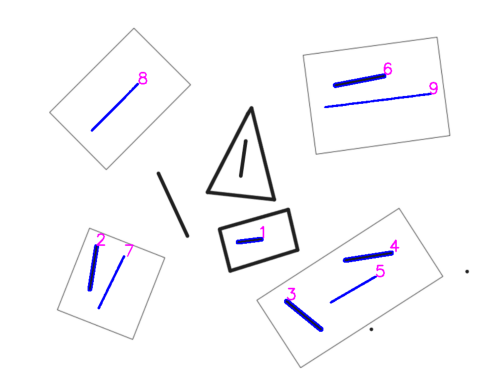

In [21]:
import cv2
import matplotlib.pyplot as plt
from math import hypot
from itertools import combinations
def max_distance(points):
    pts = points.reshape(-1, 2)
    max_d = 0
    for (x1, y1), (x2, y2) in combinations(pts, 2):
        dist = hypot(x2 - x1, y2 - y1)
        if dist > max_d:
            max_d = dist
    return max_d

def find_rectangles(contours):
    rects_found = []
    for i, cnt in enumerate(contours):
        approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True)
        if len(approx) == 4:
            x, y, w, h = cv2.boundingRect(cnt)
            rects_found.append((x, y, w, h, i))
    return rects_found

def find_and_number_lines_inside(contours, hierarchy, rects):
    lines_inside = []
    for i, cnt in enumerate(contours):
        parent_idx = hierarchy[0][i][3] 
        first_child = hierarchy[0][i][2]  
        if parent_idx != -1 and first_child == -1:
            lx, ly, lw, lh = cv2.boundingRect(cnt)
            for rx, ry, rw, rh, ridx in rects:
                if rx < lx and ry < ly and (lx + lw) < (rx + rw) and (ly + lh) < (ry + rh):
                    dist = max_distance(cnt)
                    lines_inside.append((dist, i))
                    break  
    
    lines_inside.sort(key=lambda x: x[0])
    line_nums = {idx: n+1 for n, (_, idx) in enumerate(lines_inside)}
    return lines_inside, line_nums

def draw_lines_and_numbers(img, contours, lines_inside, line_nums):
    for dist, idx in lines_inside:
        cv2.drawContours(img, [contours[idx]], -1, (255, 0, 0), 2)
        pt = tuple(contours[idx][0][0])  
        cv2.putText(img, str(line_nums[idx]), pt, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2)



img = cv2.imread('triangle.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)


contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
output = img.copy()

rects = find_rectangles(contours)
lines_inside, line_nums = find_and_number_lines_inside(contours, hierarchy, rects)
draw_lines_and_numbers(output, contours, lines_inside, line_nums)



plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
cv2.imwrite('output_image.png', output)


plt.axis('off')
plt.show()
